# Group3-Project Topic:Heart Disease Prediction
###  by: 
###          1) Mahak Sanjay Gautam
###          2) Kasturi Bhandare
###          3) Pranali More
###          4) Shivam Kandhare
### from:-PVGCOET, PUNE

In [1085]:
#Importing important libraries modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
np.random.seed()

In [1086]:
#CSV file importing
df = pd.read_csv("C:\\Users\\Mahek\\OneDrive\\Desktop\\pvgcoet\\AI& ML\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1087]:
df.shape

(303, 14)

In [1088]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [1089]:
print(df.target)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [1090]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1091]:
#Null value checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1092]:
# Checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1093]:
#Looks like the perfect dataset!!! No null values :-)

In [1094]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [1095]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

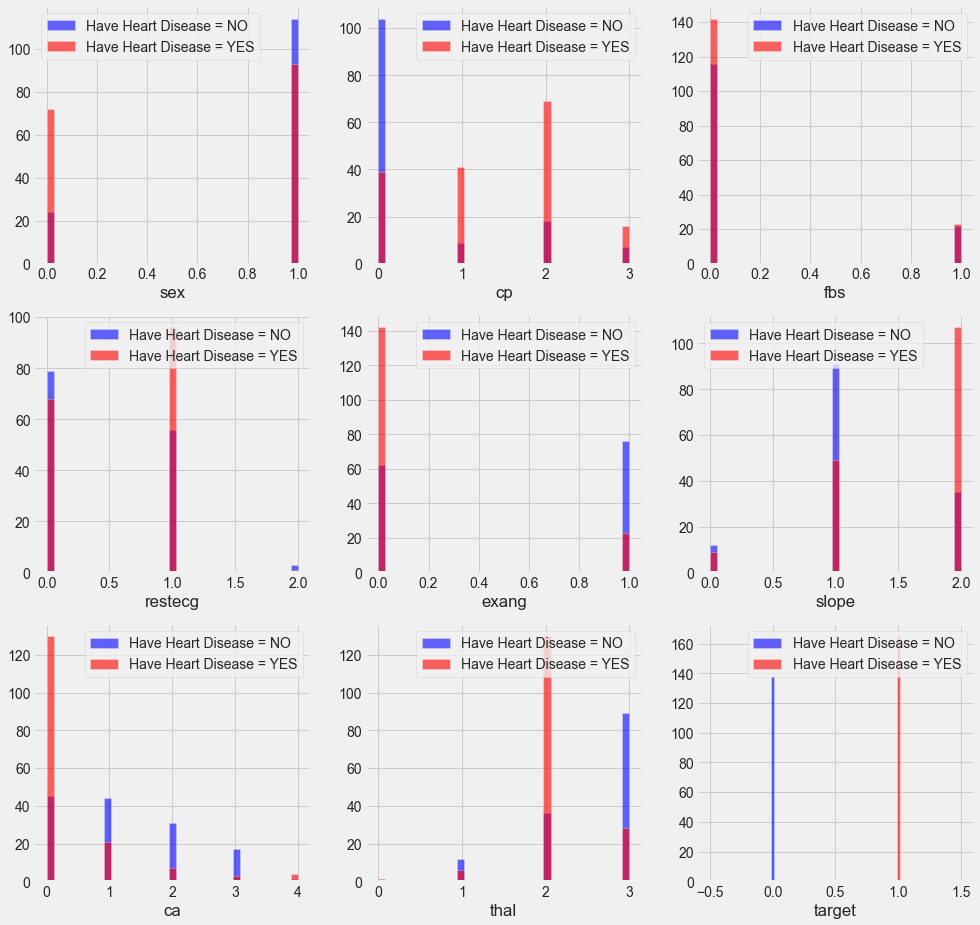

In [1096]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

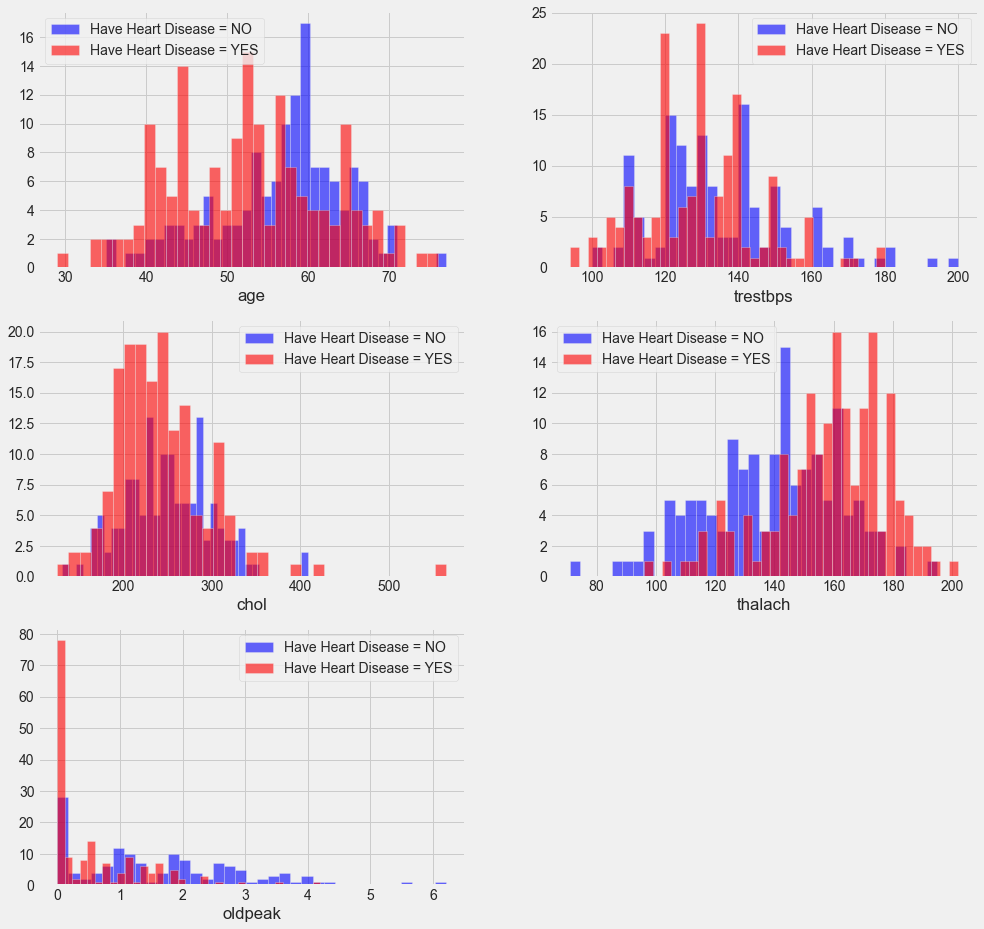

In [1097]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

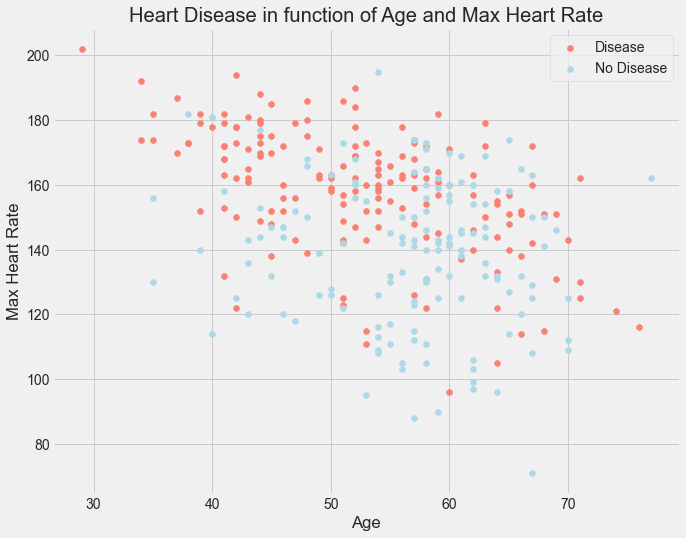

In [1098]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

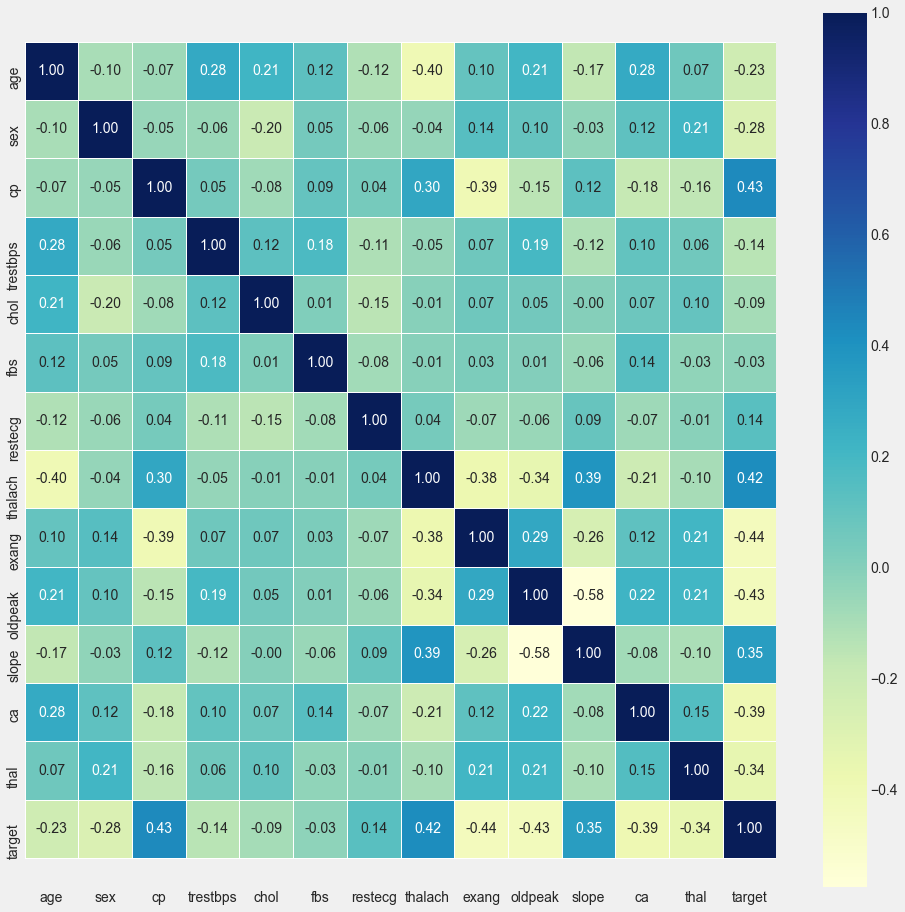

In [1099]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [1100]:
#We can see that the attributes having :
#Positive relationships
#chest pain = target
#thalcah = slope
#thalach = target
#slope = target

#Negative relationships
#oldpeak =slope
#cp = exang
#age = thalach



In [1101]:
#Data Processing
#After exploring the dataset, I observed that I need to convert some categorical variables 
#into dummy variables and scale all the values before training the Machine Learning models.
#First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [1102]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [1103]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [1104]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [1105]:
 #@Applying machine learning algorithms¶

In [1106]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [1107]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Applying Machine Learning Algorithms

In [1108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("*****Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
       
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("*****Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
       
        

In [1109]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1110]:
#Now we've got our data split into training and test sets, it's time to build a machine learning model.

#We'll train it (find the patterns) on the training set.

#And we'll test it (use the patterns) on the test set.

#We're going to try 3 different machine learning models:

# 1)Logistic Regression
# 2)Support Vector machine
# 3)K-Nearest Neighbours Classifier
# 4)Support Vector machine with PCA
# 5)K-Nearest Neighbours Classifier with PCA

# Logistic Regression

In [1111]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

*****Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
*****Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_______________________________________________

In [1112]:

#Train the model using the training sets
lr_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr_clf.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print("train confusion matrix \n",cm)

#Test the model using the training sets
lr_clf.fit(X_test, y_test)


#Predict the response for test dataset
y_pred2 = lr_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("test confusion matrix \n",cm2)

train confusion matrix 
 [[ 80  17]
 [ 11 104]]
test confusion matrix 
 [[36  5]
 [ 2 48]]


training confusion matrix 


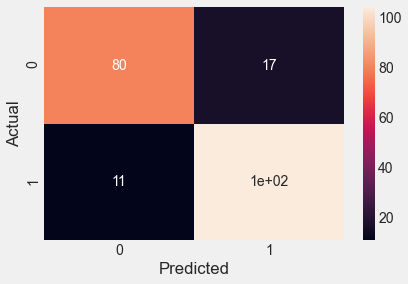

In [1113]:
# Training Confusion Matrix
print("training confusion matrix ")
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

testing confusion matrix 


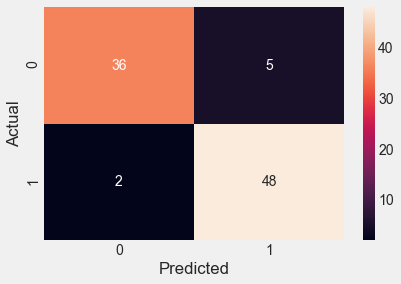

In [1114]:
#Testing Confusion Matrix
print("testing confusion matrix ")
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1115]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.773585,92.307692


# #Support Vector machine

In [1116]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

*****Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.936842    0.931624  0.933962    0.934233      0.934011
recall      0.917526    0.947826  0.933962    0.932676      0.933962
f1-score    0.927083    0.939655  0.933962    0.933369      0.933903
support    97.000000  115.000000  0.933962  212.000000    212.000000
_______________________________________________
*****Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.897959  0.879121   0.877551      0.879569
recall      0.878049   0.880000  0.879121   0.879024      0.879121
f1-score    0.867470   0.888889  0.879121   0.878179      0.879239
support    41.000000  50.000000  0.879121  91.000000     91.000000
_______________________________________________

In [1117]:

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print("train confusion matrix \n",cm)

#Test the model using the training sets
svm_clf.fit(X_test, y_test)


#Predict the response for test dataset
y_pred2 =svm_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("test confusion matrix \n",cm2)

train confusion matrix 
 [[ 89   8]
 [  6 109]]
test confusion matrix 
 [[38  3]
 [ 2 48]]


training confusion matrix 


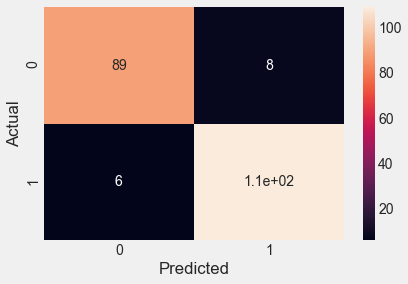

In [1118]:
# Training Confusion Matrix
print("training confusion matrix ")
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

testing confusion matrix 


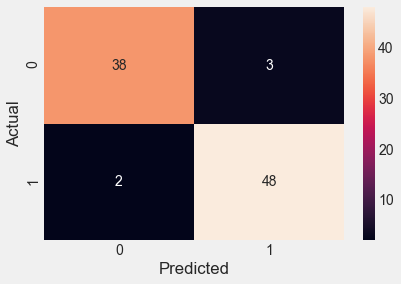

In [1119]:
#Testing Confusion Matrix
print("testing confusion matrix ")
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1120]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["SVM ", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.773585,92.307692
1,SVM,78.773585,94.505495


# K-nearest neighbors

In [1121]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

*****Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.863158    0.871795  0.867925    0.867476      0.867843
recall      0.845361    0.886957  0.867925    0.866159      0.867925
f1-score    0.854167    0.879310  0.867925    0.866739      0.867806
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
*****Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.853659   0.88  0.868132   0.866829      0.868132
recall      0.853659   0.88  0.868132   0.866829      0.868132
f1-score    0.853659   0.88  0.868132   0.866829      0.868132
support    41.000000  50.00  0.868132  91.000000     91.000000
_______________________________________________


In [1122]:

#Train the model using the training sets
knn_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn_clf.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print("train confusion matrix \n",cm)

#Test the model using the training sets
knn_clf.fit(X_test, y_test)


#Predict the response for test dataset
y_pred2 =knn_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("test confusion matrix \n",cm2)

train confusion matrix 
 [[ 82  15]
 [ 13 102]]
test confusion matrix 
 [[36  5]
 [ 3 47]]


training confusion matrix 


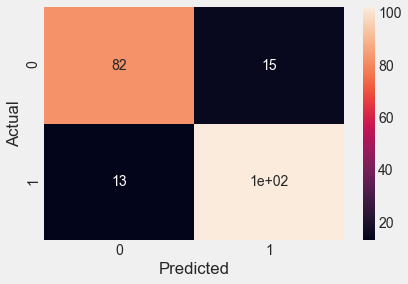

In [1123]:
# Training Confusion Matrix
print("training confusion matrix ")
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

testing confusion matrix 


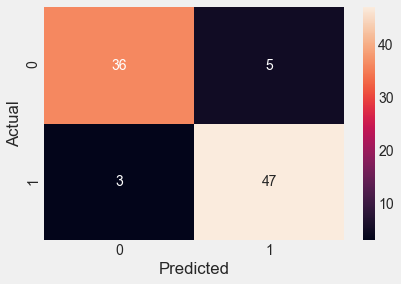

In [1124]:
#Testing Confusion Matrix
print("testing confusion matrix ")
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1125]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.773585,92.307692
1,SVM,78.773585,94.505495
2,K-nearest neighbors,75.943396,91.208791


# SVM with PCA

In [1126]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [1127]:
df = pd.read_csv("C:\\Users\\Mahek\\OneDrive\\Desktop\\pvgcoet\\AI& ML\\heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1128]:
# Total number of rows in the dataset
print(len(df)) 

303


In [1129]:
x = df.iloc[:,0:8].values
Y = df.iloc[:,8].values

#Test train split
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.25)

#Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Applying PCA here
from sklearn.decomposition import PCA
pca = PCA(n_components= None) #We will set it none so that we can see the variance explained and then choose no of comp.
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.22590394, 0.16131642, 0.15479471, 0.12620826, 0.10119221,
       0.09063032, 0.08373848, 0.05621567])

In [1130]:
#n=2
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components= 2) # here you can change this number to play around
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

classifier.fit(x_train,Y_train)
#Predict the train set values
Y_pred2= classifier.predict(x_train)
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_train,Y_pred2)
print("training confusion matrix \n ",cm2)

classifier.fit(x_test,Y_test)
#Predict the test set values
Y_pred = classifier.predict(x_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("testing confusion matrix \n ",cm)

training confusion matrix 
  [[140  20]
 [ 41  41]]
testing confusion matrix 
  [[42  2]
 [11  6]]


training confusion matrix 


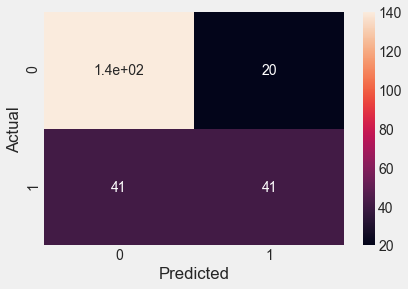

In [1131]:
# training Confusion Matrix
print("training confusion matrix ")
confusion_matrix = pd.crosstab(Y_train,Y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()


testing confusion matrix 


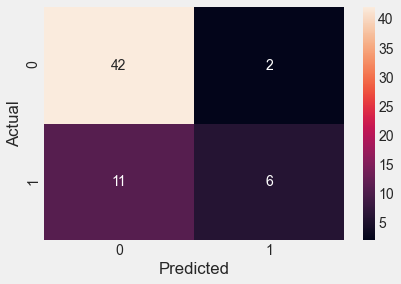

In [1132]:
# testing Confusion Matrix
print("testing confusion matrix ")
confusion_matrix = pd.crosstab(Y_test,Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1133]:

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.3,random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(x_train,Y_train)

#Predict the result for test values
Y_pred = classifier_svm_kernel.predict(x_test)



In [1134]:
#Apply k-fold validation here
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_kernel,X=x_train,y=Y_train,cv=10)
accuracies

array([0.63636364, 0.72727273, 0.80952381, 0.66666667, 0.80952381,
       0.71428571, 0.76190476, 0.80952381, 0.76190476, 0.71428571])

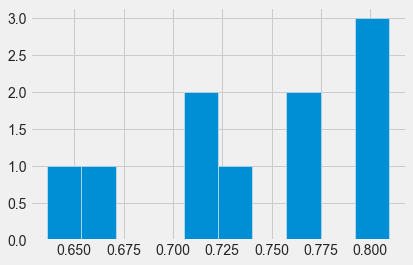

In [1135]:
plt.hist(accuracies)
plt.show()

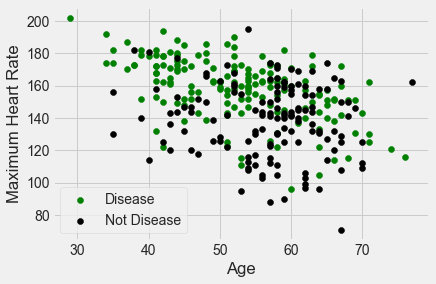

In [1136]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [1137]:
#Applying grid search for optimal parameters and model after k-fold validation
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[0.01,0.1,1,10,50,100,500,1000], 'kernel':['rbf'], 'gamma': [0.1,0.125,0.15,0.17,0.2]}]
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(x_train,Y_train)

In [1138]:
#Reloading the features and labels and normalizing them
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.25,random_state=10)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Choosing different principal components
pca = PCA(n_components= 7) # here you can change this number to play around
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#Create classifier object
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.25,tol=0.000001)
classifier_svm_kernel.fit(x_train,Y_train)

# Grid search and k fold validation libraries already imported. So start the grid search
grid_search1 = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters ,scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search1.fit(x_train,Y_train)

best_accuracy = grid_search.best_score_
print("Training Accuracy:",best_accuracy*100)

grid_search1 = grid_search.fit(x_test,Y_test)

best_accuracy1 = grid_search1.best_score_
print("Testing Accuracy:",best_accuracy1*100)

Training Accuracy: 77.47035573122531
Testing Accuracy: 87.85714285714286


In [1139]:
# 3)	svm with PCA	Training Accuracy: 77.47035573122531
#        for n=7        Testing Accuracy: 87.85714285714286


# KNN with PCA

In [1140]:
df = pd.read_csv("C:\\Users\\Mahek\\OneDrive\\Desktop\\pvgcoet\\AI& ML\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1141]:
X = df.iloc[:,:5].values
y = df.iloc[:,5].values

In [1142]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state=42)

In [1143]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [1144]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

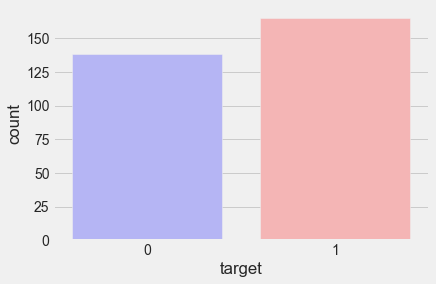

In [1145]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

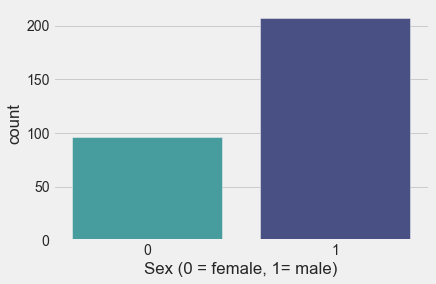

In [1146]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

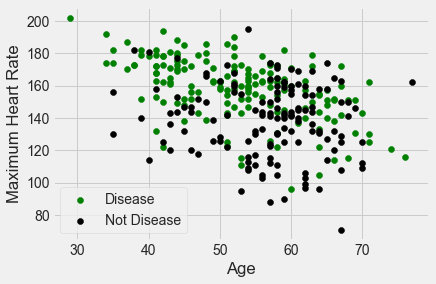

In [1147]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [1148]:
X = df.iloc[:,:-1].values
y = df.iloc[:,13].values

In [1149]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state=5)

In [1150]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [1151]:
#Applying PCA here
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [1152]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_train)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print("train confusion matrix \n",cm)

#Test the model using the training sets
knn.fit(X_test, y_test)

#Predict the response for test dataset
y_pred2 = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("test confusion matrix \n",cm2)

train confusion matrix 
 [[ 82  26]
 [ 21 113]]
test confusion matrix 
 [[26  4]
 [ 2 29]]


training confusion matrix 


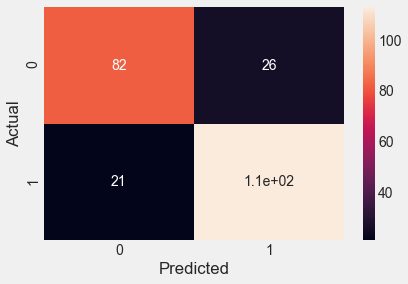

In [1153]:
# Training Confusion Matrix
print("training confusion matrix ")
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

testing confusion matrix 


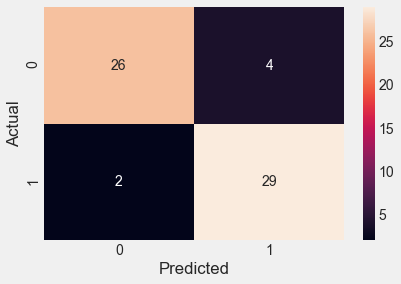

In [1154]:
#Test Confusion Matrix
print("testing confusion matrix ")
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1155]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy

print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)

Training Accuracy: 80.57851239669421
Testing Accuracy: 90.1639344262295


In [1156]:
# 4)	K-nearest neighbors with PCA for n=11	Training Accuracy:  80.57851239669421
#                                                Testing Accuracy: 90.1639344262295


#        Model	:  	                        Training Accuracy %	    &    Testing Accuracy %
# 0	  Logistic Regression	:                78.77                   &          92.30
# 1	 Support Vector Machine	:            78.77                   &          94.50
# 2	 K-nearest neighbors:	               75.94                     &       91.20
# 3 SVM with PCA (n=7)  :                   77.47                    &         87.85
# 4 K-nearest neighbors with PCA:   80.57                      &      90.16
#                (n=11)                               


In [1157]:
#END 
#THANK YOU